In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import Imputer

data = pd.read_csv('all_universal_animals_features.txt', sep='\t')
data.index = range(0, len(data))

# shuffle data frame rows (optional)
data = data.sample(frac=1).reset_index(drop=True)
data[:5]

Using TensorFlow backend.


,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,23.107143,21,0.360983,NaN,28,7,7,0,0,0,...,NO,0.583333,72.0,12.0,12.0,1.0,-24.7,1.0,14.0,10.0
1,20.924242,20,0.277991,0.055553,66,3,3,0,0,3,...,YES,0.666667,51.0,4.0,6.0,1.0,-8.2,1.0,14.0,7.0
2,22.628571,12,0.841837,0.123810,35,15,15,2,1,11,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.166667,23,0.683950,0.166667,6,5,5,0,0,3,...,NO,0.769231,63.0,1.0,7.0,1.0,-24.4,1.0,20.0,6.0
4,27.250000,27,0.443783,NaN,8,1,1,0,0,0,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Inspcet first 10 lines of raw data across all columns (in 3 parts)

In [2]:
# Part-1
data.iloc[:5,:10]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB
0,23.107143,21,0.360983,NaN,28,7,7,0,0,0
1,20.924242,20,0.277991,0.055553,66,3,3,0,0,3
2,22.628571,12,0.841837,0.123810,35,15,15,2,1,11
3,25.166667,23,0.683950,0.166667,6,5,5,0,0,3
4,27.250000,27,0.443783,NaN,8,1,1,0,0,0


In [3]:
# Part-2
data.iloc[:5,10:23]

,gap_droppin_len,gcs,ats,cpg,cwf,ce,cz,cm2,cm3,ct2,ct3,cl2,cl3
0,0,0.333333,0.066667,0.500000,2.084621,0.960895,0.452830,0.888883,0.697784,0.8125,0.701705,0.85,0.857143
1,1,0.000000,0.066667,0.666667,1.982414,0.930414,0.446809,0.786610,0.648735,0.6250,0.526316,0.70,0.769231
2,8,0.052632,0.333333,0.211111,2.059446,0.780884,0.468085,0.688978,0.607740,0.5000,0.350000,0.60,0.650000
3,0,0.111111,0.500000,0.225000,2.159703,0.913123,0.500000,0.801222,0.675585,0.6875,0.515625,0.75,0.750000
4,0,0.166667,0.125000,0.342857,2.205346,0.985071,0.491228,0.934002,0.714465,0.9375,0.757212,0.95,0.869565


In [4]:
# Part-3
data.iloc[:5,23:]

,ident2rev_compl_clust,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,69,NO,0.583333,72.0,12.0,12.0,1.0,-24.7,1.0,14.0,10.0
1,81,YES,0.666667,51.0,4.0,6.0,1.0,-8.2,1.0,14.0,7.0
2,76,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,NO,0.769231,63.0,1.0,7.0,1.0,-24.4,1.0,20.0,6.0
4,68,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br><br><br><br>

#### Replace YES/NO flags with 1/0

In [5]:
label_mapping = {'YES': 1, 'NO': 0}
data = data.replace({'hits_on_mature_miR': label_mapping})
y = data['hits_on_mature_miR']

#### Normalise data

In [6]:
data = (data - data.min()) / (data.max() - data.min())
data[:5]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,0.592262,0.40,0.360983,NaN,2.228222e-06,0.179487,0.179487,0.00,0.000000,0.000000,...,0.0,0.583333,0.702128,0.342857,0.154930,0.0,0.688131,1.0,0.448276,0.344828
1,0.410354,0.38,0.277991,0.069551,5.909632e-06,0.076923,0.076923,0.00,0.000000,0.071429,...,1.0,0.666667,0.478723,0.114286,0.070423,0.0,0.896465,1.0,0.448276,0.241379
2,0.552381,0.22,0.841837,0.155007,2.906377e-06,0.384615,0.384615,0.25,0.055556,0.261905,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.763889,0.44,0.683950,0.208662,9.687922e-08,0.128205,0.128205,0.00,0.000000,0.071429,...,0.0,0.769231,0.606383,0.028571,0.084507,0.0,0.691919,1.0,0.655172,0.206897
4,0.937500,0.52,0.443783,NaN,2.906377e-07,0.025641,0.025641,0.00,0.000000,0.000000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Impute missing values (with median)

In [7]:
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(data))
imputed_DF.columns = data.columns
imputed_DF.index = data.index
data = imputed_DF

data[:5]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,0.592262,0.40,0.360983,0.400000,2.228222e-06,0.179487,0.179487,0.00,0.000000,0.000000,...,0.0,0.583333,0.702128,0.342857,0.154930,0.000000,0.688131,1.000000,0.448276,0.344828
1,0.410354,0.38,0.277991,0.069551,5.909632e-06,0.076923,0.076923,0.00,0.000000,0.071429,...,1.0,0.666667,0.478723,0.114286,0.070423,0.000000,0.896465,1.000000,0.448276,0.241379
2,0.552381,0.22,0.841837,0.155007,2.906377e-06,0.384615,0.384615,0.25,0.055556,0.261905,...,0.0,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615
3,0.763889,0.44,0.683950,0.208662,9.687922e-08,0.128205,0.128205,0.00,0.000000,0.071429,...,0.0,0.769231,0.606383,0.028571,0.084507,0.000000,0.691919,1.000000,0.655172,0.206897
4,0.937500,0.52,0.443783,0.470695,2.906377e-07,0.025641,0.025641,0.00,0.000000,0.000000,...,0.0,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695


#### Re-integrate TP label with the original data

In [8]:
data['TP'] = y
data[:5]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched,TP
0,0.592262,0.40,0.360983,0.400000,2.228222e-06,0.179487,0.179487,0.00,0.000000,0.000000,...,0.583333,0.702128,0.342857,0.154930,0.000000,0.688131,1.000000,0.448276,0.344828,0
1,0.410354,0.38,0.277991,0.069551,5.909632e-06,0.076923,0.076923,0.00,0.000000,0.071429,...,0.666667,0.478723,0.114286,0.070423,0.000000,0.896465,1.000000,0.448276,0.241379,1
2,0.552381,0.22,0.841837,0.155007,2.906377e-06,0.384615,0.384615,0.25,0.055556,0.261905,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0
3,0.763889,0.44,0.683950,0.208662,9.687922e-08,0.128205,0.128205,0.00,0.000000,0.071429,...,0.769231,0.606383,0.028571,0.084507,0.000000,0.691919,1.000000,0.655172,0.206897,0
4,0.937500,0.52,0.443783,0.470695,2.906377e-07,0.025641,0.025641,0.00,0.000000,0.000000,...,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0.470695,0


<br><br><br><br>

### Split data into training and test sets

In [9]:
split_ratio = 0.8

sample = np.random.choice(data.index, size=int(len(data)*split_ratio), replace=False)
train_data, test_data = data.iloc[sample], data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

Number of training samples is 417188
Number of testing samples is 104297


#### Create np.arrays for X_train/test and y_train/test sets

In [10]:
X_train = np.array(train_data.drop('TP', axis=1))
y_train = np.array(keras.utils.to_categorical(train_data['TP'], 2))

X_test = np.array(test_data.drop('TP', axis=1))
y_test = np.array(keras.utils.to_categorical(test_data['TP'], 2))


print("Number of rows in X_train: ", len(X_train))
print("Number of rows in y_train: ", len(y_train))
print("Number of rows in X_test", len(X_test))
print("Number of rows in y_test", len(y_test))

Number of rows in X_train:  417188
Number of rows in y_train:  417188
Number of rows in X_test 104297
Number of rows in y_test 104297


<br><br><br><br>

### Train model using optimal parameters <span style='font-size:12px'>(found via GridSearchCV)</span>

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import SGD
from keras.optimizers import RMSprop

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create the model
def create_model(optimizer='adam'):
    
    init_mode = 'he_normal'
    reglr = 0.01
#     optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
    
    # Building the model
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(reglr)))
    model.add(Dropout(.4))
    model.add(Dense(32, kernel_initializer=init_mode, activation='relu', kernel_regularizer=regularizers.l2(reglr)))
    model.add(Dropout(.4))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

#### Fit the model

In [12]:
callbacks = [EarlyStopping(monitor='acc', patience=2)] # do not apply without checking first with no callbacks

out = model.fit(X_train, y_train, epochs=30, batch_size=128, verbose=1, validation_split=0.2, callbacks=callbacks)

Train on 333750 samples, validate on 83438 samples
Epoch 1/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.1105 - acc: 0.9931 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 2/30
333750/333750 [==============================] - 4s 13us/step - loss: 0.0269 - acc: 0.9999 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 3/30
333750/333750 [==============================] - 4s 13us/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 4/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 5/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 6/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 7/30
333750/333750 [==============================] - 4s 13us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0

#### Plot training / validation loss and accuracy change at each epoch

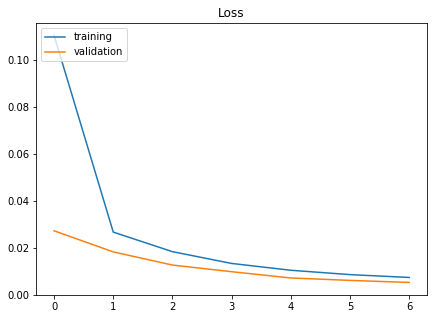

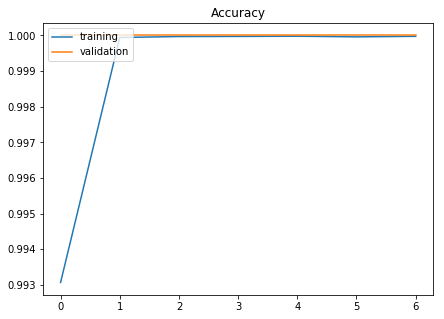

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = np.array(out.__dict__['epoch'])
acc = np.array(out.__dict__['history']['acc'])
loss = np.array(out.__dict__['history']['loss'])
val_acc = np.array(out.__dict__['history']['val_acc'])
val_loss = np.array(out.__dict__['history']['val_loss'])

f = plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='training')
plt.plot(epochs, val_loss, label='validation')
plt.legend(loc='upper left')
plt.title('Loss')

plt.show()

f = plt.figure(figsize=(7,5))
plt.plot(epochs, acc, label='training')
plt.plot(epochs, val_acc, label='validation')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

f.savefig("train_validation_loss.pdf", bbox_inches='tight')

#### Evaluating the model on the training and testing set

In [14]:
train_score = model.evaluate(X_train, y_train, verbose=1)
print("\n Training Accuracy:", train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=1)
print("\n Testing Accuracy:", test_score[1])

417188/417188 [==============================] - 7s 17us/step

 Training Accuracy: 1.0
104297/104297 [==============================] - 2s 17us/step

 Testing Accuracy: 1.0


#### Get confusion matrix

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = y.values.argmax

y_pred = model.predict_classes(X_test)

p = model.predict_proba(X_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print()
TN, FP, FN, TP = confusion_matrix(np.argmax(y_test, axis=1), y_pred).ravel()
print("TP:", TP)
print("FN:", FN)
print("TN:", TN)
print("FP:", FP)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     78814
          1       1.00      1.00      1.00     25483

avg / total       1.00      1.00      1.00    104297

[[78814     0]
 [    0 25483]]

TP: 25483
FN: 0
TN: 78814
FP: 0


#### Inspect predicted positives

In [16]:
conc = pd.concat([pd.DataFrame(y_test), pd.DataFrame(p)], axis=1)
conc.columns = ['test_0', 'test_1', 'pred_0', 'pred_1']
subdf = conc.loc[conc['test_1'] == 1]
p = subdf.loc[subdf['pred_1'] >= 0.5]

p[:15]
res = subdf.loc[subdf['pred_1'] >= 0.5]
res[:5]

,test_0,test_1,pred_0,pred_1
2,0.0,1.0,0.000317,0.999683
6,0.0,1.0,0.000412,0.999588
13,0.0,1.0,0.000277,0.999723
15,0.0,1.0,0.000273,0.999727
16,0.0,1.0,0.000229,0.999772
